In [7]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from scripts.data_utils import get_dataloader
from data.animals.translate import translate

In [8]:
# Load data
dataset = datasets.ImageFolder('../data/animals/raw-img')

# Translate class names
dataset.classes = [translate[x] for x in dataset.classes]

# Get class labels
print(dataset.classes)

['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']


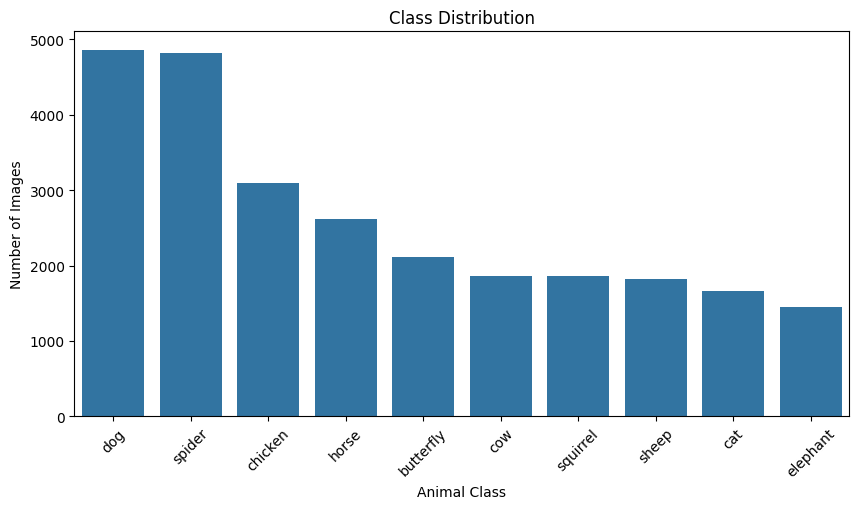

In [9]:
# Extract class names and their counts
class_counts = pd.DataFrame(dataset.targets, columns=["Class"]).value_counts().reset_index()
class_counts.columns = ['Class', 'Count']
class_names = dataset.classes

# Map numerical labels to class names
class_counts['Class'] = class_counts['Class'].map(lambda x: class_names[x])

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts['Class'], y=class_counts['Count'])
plt.xticks(rotation=45)
plt.xlabel("Animal Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.show()

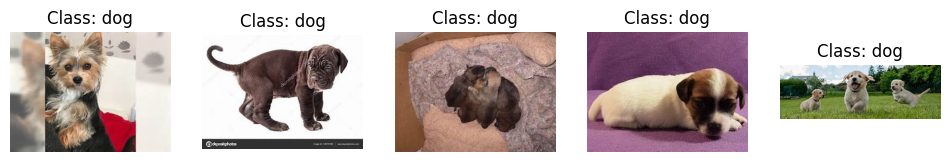

In [10]:
# Define function to show images
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 6))
    for i in range(num_images):
        img, label = dataset[i]
        axes[i].imshow(img)
        axes[i].set_title(f"Class: {class_names[label]}")
        axes[i].axis("off")

    plt.show()

# Show sample images
show_images(dataset)

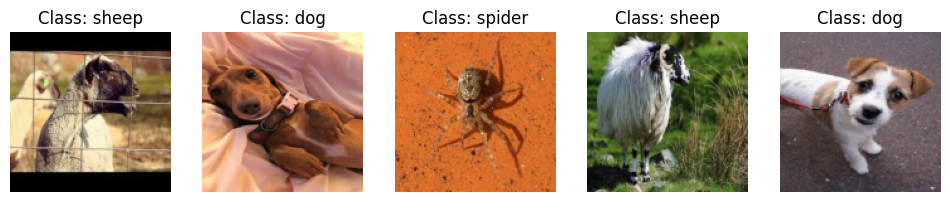

In [11]:
# Load transformed data 
dataset, dataloader = get_dataloader('../data/animals/raw-img')

# Define function to show transformed images
def show_transformed_images(loader):
    images, labels = next(iter(loader))
    fig, axes = plt.subplots(1, 5, figsize=(12, 6))
    for i in range(5):
        img = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy
        img = (img - img.min()) / (img.max() - img.min())  # Normalize for display
        axes[i].imshow(img)
        axes[i].set_title(f"Class: {dataset.classes[labels[i].item()]}")
        axes[i].axis("off")
    plt.show()

# Display transformed images
show_transformed_images(dataloader)